In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

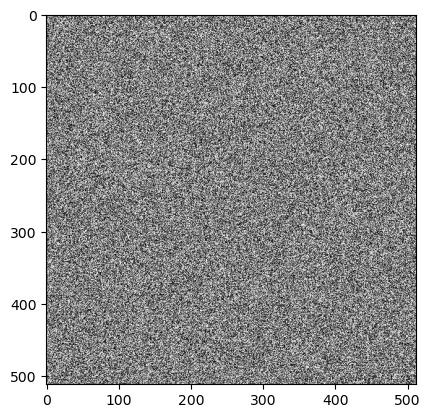

In [13]:
x = np.random.uniform(low = -0.5, high = 0.5, size = (512,512))
x_scaled = 255 * (x + 0.5)
x_scaled = x_scaled.astype(np.uint8)
plt.imshow(x_scaled, cmap=plt.cm.gray)

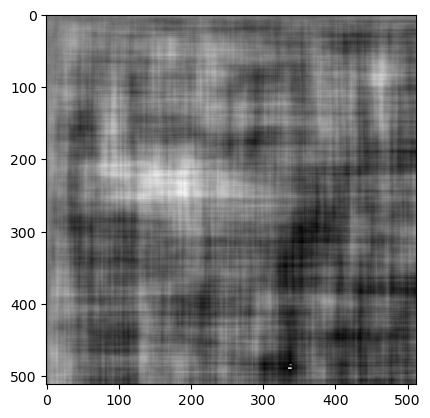

In [14]:
y = np.zeros((512,512))
height, width = x_scaled.shape
for i in range(height):
    for j in range(width):
        if (i == 0 and j == 0):
            y[i,j] = 3*x[i,j]
        if (i == 0 and j > 0):
            y[i,j] = 3*x[i,j] + 0.99*y[i, j-1]
        if (i > 0 and j == 0):
            y[i,j] = 3*x[i,j] + 0.99*y[i-1, j]
        if (i > 0 and j > 0):
            y[i,j] = 3*x[i,j] + (0.99*y[i-1, j]) + (0.99*y[i, j-1]) - (0.9801 * y[i-1,j-1])
            
plt.imshow((y + 127).astype(np.uint8), cmap=plt.cm.gray)

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_538/1247344593.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$\mu$ axis')


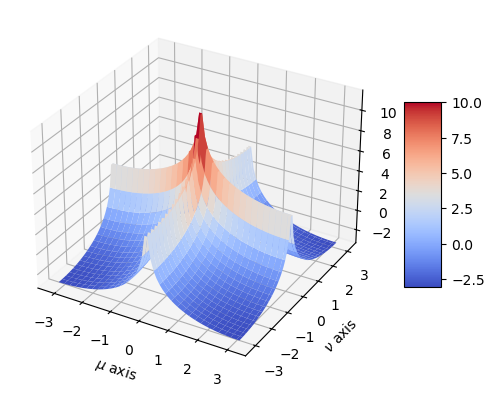

In [18]:
import matplotlib.pyplot as plt

N = 64

a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

density = (np.abs((3 / (1 - 0.99 * np.exp(-1j * X) - 0.99* np.exp(-1j * Y) + 0.9801*np.exp(-1j * (X + Y))))))**2 * (1/12)
density_log = np.log(density)

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, density_log, cmap=plt.cm.coolwarm)
ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')

fig.colorbar(surf, shrink=0.5, aspect=5)

<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_538/4284070849.py:45: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$\mu$ axis')


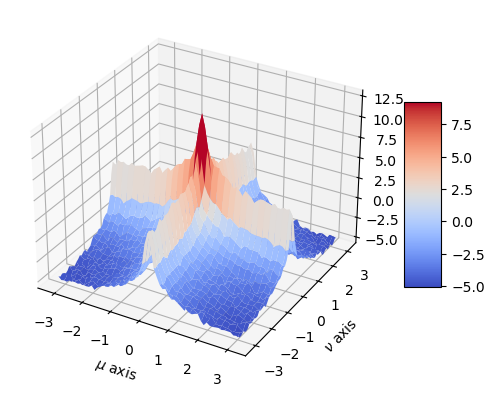

In [17]:
def BetterSpecAnal(x):
    # We apply a square of 5x5 non-overlapping filters. The center of the centered filter is in the center of the image
    N = 64 #window size

    #Getting the coordinates of the pixel where the first filter will be applied
    height, width = x.shape
    i = int(height/2 - 5*N/2) 
    j = int(width/2 - 5*N/2) 
    
    W = np.outer(np.hamming(64), np.hamming(64))
    
    Z = np.zeros((N,N))
    
    for _ in range(5):            
        for _ in range(5):
            z = x[i:N+i, j:N+j] * W
            # Compute the power spectrum for the NxN region.
            Z = Z + (1/N**2)*np.abs(np.fft.fft2(z))**2
            j = j + N
        
        i = i + N
        j = int(width/2 - 5*N/2) #reset j

    # Use fftshift to move the zero frequencies to the center of the plot.
    Z = np.fft.fftshift(Z)
    
    # Compute the average between the 25 filters
    Zabs_avg = Z / 25
    
    # Compute the logarithm of the Power Spectrum.
    Zabs_avg_log = np.log(Zabs_avg)
    
    return Zabs_avg_log

Zabs = BetterSpecAnal(y)

N= 64
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.linspace(-np.pi, np.pi, num = N)
X, Y = np.meshgrid(a, b)

surf = ax.plot_surface(X, Y, Zabs, cmap=plt.cm.coolwarm)

ax.set_xlabel('$\mu$ axis')
ax.set_ylabel('$\\nu$ axis')
ax.set_zlabel('Z Label')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()